In [1]:
import kagglehub
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')
print(os.listdir(dataset))

['animals', 'images']


In [3]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [4]:

dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [5]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [6]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

In [7]:
train_data = [] #A list for store processed img


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (150, 150))
        train_data.append([img_gray, label])

The program processes training data by organizing images from multiple categories such as 'dogs', 'cats', and 'pandas'. It starts by initializing an empty list named train_data to hold the images along with their associated labels. For every category, it determines the path to the relevant folder, retrieves all image filenames, and randomly shuffles them for variety. From this shuffled list, it selects the first 100 images.

Each chosen image is then read, converted to grayscale (removing any color), and resized to 100x100 pixels. These processed images are then combined with their respective labels—derived from their category—and added to the train_data list. In total, the program processes 300 images, 100 from each category, preparing them for model training.

In [8]:
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[1, 2, 0, 1, 0, 1, 2, 0, 2, 1]


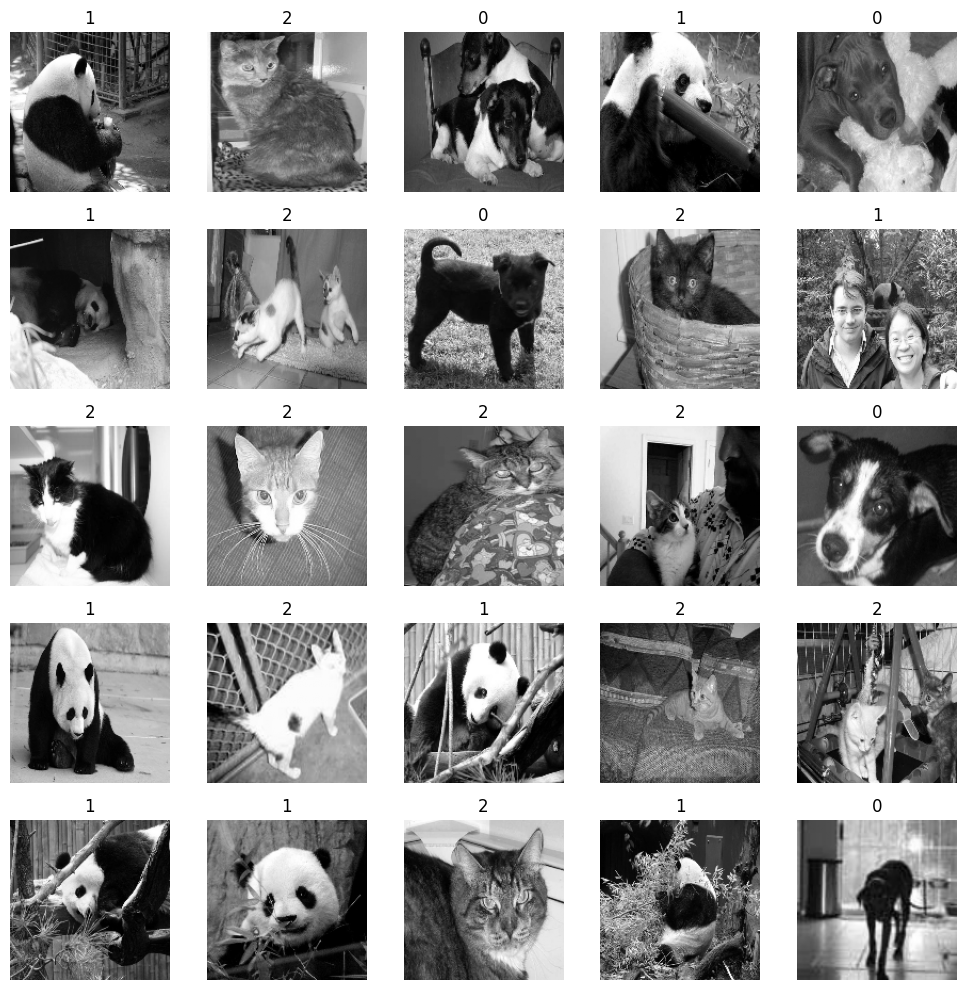

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
  if i < len(train_data):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

The program displays a collection of images from the dataset, each labeled to indicate the type of animal it represents—dog, cat, or panda. Using Matplotlib, the images are shown in a grid layout, all in grayscale. Each image is presented in its original grayscale format, and its label (0 for dog, 1 for cat, 2 for panda) corresponds to its animal category.

The code iterates over the train_data list and plots each image in the grid, setting the title of each subplot using ax.set_title(label) to display the corresponding label. This labeling helps identify which animal each image belongs to. The visualization provides a clear way to inspect the dataset, allowing us to see how the model might distinguish between different animal classes based on visual features.

In [10]:
#the train_data is being divided into 5 folds for cross-validation
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)

5

In [11]:
# Iterate through each fold, extract labels, and print the fold number and its labels
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold

Fold 1:
Labels: [1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1]
Fold 2:
Labels: [2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1]
Fold 3:
Labels: [0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1]
Fold 4:
Labels: [1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 1]
Fold 5:
Labels: [0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0]


In [12]:
def l2_distance(valid_img, train_img):
    difference = valid_img - train_img  # Calculate element-wise difference
    squared_difference = np.square(difference)  # Square the differences
    summed_squares = np.sum(squared_difference)  # Sum all squared differences
    distance = np.sqrt(summed_squares)  # Take the square root to get Euclidean distance
    return distance

def l1_distance(valid_img, train_img):
    difference = np.abs(valid_img - train_img)  # Calculate element-wise absolute difference
    distance = np.sum(difference)  # Sum all absolute differences to get Manhattan distance
    return distance

In [13]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label

Accuracy calculate

   Add blockquote

In [14]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")


K = 1:
  Average Accuracy: 0.40
  Fold Accuracies: [0.45, 0.5, 0.3, 0.4, 0.35]

K = 2:
  Average Accuracy: 0.40
  Fold Accuracies: [0.45, 0.5, 0.3, 0.4, 0.35]

K = 3:
  Average Accuracy: 0.40
  Fold Accuracies: [0.4166666666666667, 0.5, 0.3, 0.45, 0.31666666666666665]

K = 4:
  Average Accuracy: 0.42
  Fold Accuracies: [0.43333333333333335, 0.48333333333333334, 0.2833333333333333, 0.5333333333333333, 0.35]

K = 5:
  Average Accuracy: 0.41
  Fold Accuracies: [0.45, 0.48333333333333334, 0.3333333333333333, 0.45, 0.31666666666666665]

K = 6:
  Average Accuracy: 0.42
  Fold Accuracies: [0.5, 0.48333333333333334, 0.3333333333333333, 0.45, 0.3333333333333333]

K = 7:
  Average Accuracy: 0.45
  Fold Accuracies: [0.5, 0.5, 0.4, 0.48333333333333334, 0.35]

K = 8:
  Average Accuracy: 0.44
  Fold Accuracies: [0.4666666666666667, 0.5, 0.35, 0.5166666666666667, 0.35]

K = 9:
  Average Accuracy: 0.45
  Fold Accuracies: [0.48333333333333334, 0.5333333333333333, 0.38333333333333336, 0.45, 0.4]

K = 1

In [15]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"K = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")

K = 1:
  Average Accuracy: 0.38
  Fold Accuracies: [0.38333333333333336, 0.4, 0.3333333333333333, 0.4, 0.38333333333333336]
K = 2:
  Average Accuracy: 0.38
  Fold Accuracies: [0.38333333333333336, 0.4, 0.3333333333333333, 0.4, 0.38333333333333336]
K = 3:
  Average Accuracy: 0.40
  Fold Accuracies: [0.45, 0.38333333333333336, 0.4, 0.4166666666666667, 0.36666666666666664]
K = 4:
  Average Accuracy: 0.39
  Fold Accuracies: [0.4166666666666667, 0.35, 0.31666666666666665, 0.43333333333333335, 0.4166666666666667]
K = 5:
  Average Accuracy: 0.42
  Fold Accuracies: [0.4666666666666667, 0.45, 0.38333333333333336, 0.43333333333333335, 0.35]
K = 6:
  Average Accuracy: 0.41
  Fold Accuracies: [0.5, 0.38333333333333336, 0.35, 0.38333333333333336, 0.43333333333333335]
K = 7:
  Average Accuracy: 0.41
  Fold Accuracies: [0.4666666666666667, 0.43333333333333335, 0.2833333333333333, 0.4166666666666667, 0.43333333333333335]
K = 8:
  Average Accuracy: 0.40
  Fold Accuracies: [0.45, 0.4, 0.3166666666666666

Show the **graph**

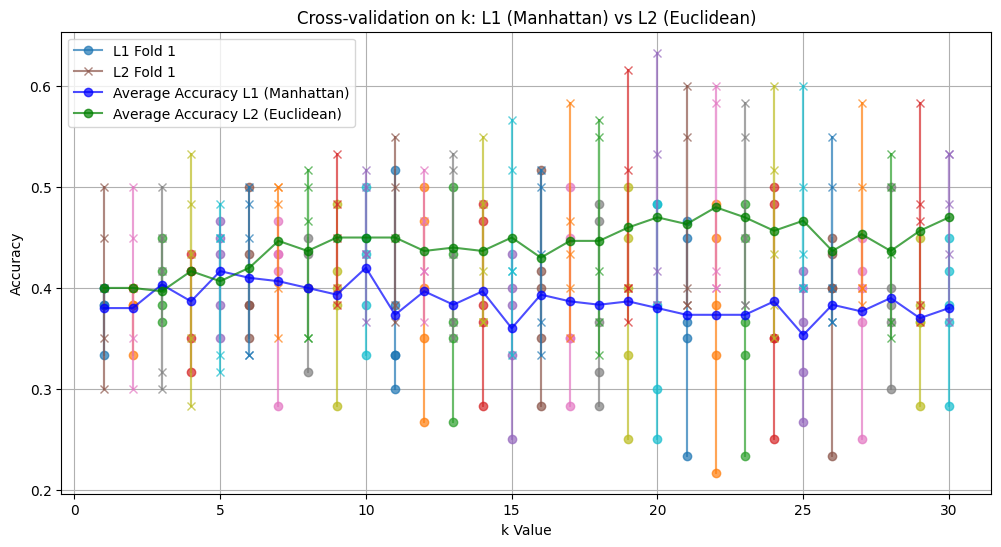

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(30):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()



The graph depicts the behavior of the k-NN model with different values of k for Manhattan (L1) and Euclidean (L2) distances. The main points are:

**Varying Performance:**
As both distance measures exhibit changing accuracy across different k values, particularly in the lower k range (e.g., k=5–15), this variation is likely due to the model’s sensitivity to local patterns in the data, the presence of outliers, and how each distance metric handles feature scaling. In your graph, this is evident from the vertical scatter of fold accuracies, where L1 and L2 vary in spread. L1 (Manhattan) often adapts better to sparse or noisy datasets, while L2 (Euclidean) may become unstable when the features are not normalized.


**Optimal k Values:**
The range of k between 5 and 15 appears to be the optimal zone where the k-NN model finds a good balance between bias and variance. In this range, Manhattan (L1) distance shows higher average accuracy than Euclidean (L2), which suggests that L1 generalizes better in this dataset. At higher k values (e.g., k=25), the difference between L1 and L2 narrows, and both distances reach a plateau—indicating that increasing k beyond a certain point adds minimal benefit and may lead to over-generalization.

**Model Stability:**
The vertical clusters in the graph represent the spread of accuracy across different folds. L1 shows narrower spreads at optimal k values, suggesting that its performance is more consistent across different training and testing splits. On the other hand, L2 shows a wider variation—particularly at smaller k values—indicating that it is more sensitive to how the data is partitioned, which may be due to outliers or the scale of features affecting Euclidean distances more.

**Variation Across 5 Folds:**
The broader vertical spread of L2 fold accuracies at certain k values (e.g., k=5) highlights its higher dependency on the specific cross-validation split. In contrast, the tighter grouping of L1 fold accuracies suggests greater stability and robustness even when the dataset is shuffled differently.

**Selecting the Proper Distance Measure:**
Based on the results shown in the graph, Manhattan (L1) distance outperforms Euclidean (L2) in terms of average accuracy and consistency within the critical k range (k=5–15). This makes L1 more suitable for datasets.L2 remains a viable option for higher k values and could potentially outperform L1 if the data were normalized or followed smooth geometric relationships.

**Final Recommendation:**
Choose L1 (Manhattan) as the preferred distance metric for this model and dataset. It offers better accuracy and stability within the optimal k range, and is also more efficient in high-dimensional space. Opt for L2 (Euclidean) only if the dataset is normalized and the structure of the problem supports it.
